# Assignment: Unsupervised Machine Learning \ Clustering

In this assignment you will continue the experience you've done with clustering - this time, via hierarchical clustering and DBSCAN.

## Part 1: Hierarchical Clustering
(Practice material by Etam Benger)

In this part we are going to experiment with Hierarchical Clustering, a very powerfull clustering technique that can easily be interperted and explained via the dendrgoram.

The analyses are made on real datasets under the circumstances of real life challenges in unsupervised machine learning.

### Different ways to calculate the distance between clusters can yield strikingly different results

In [2]:
import numpy as np
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Labels
l = ['A', 'B', 'C', 'D', 'E', 'F']

# Distance matrix
# (Note that it must be symmetrical and its diagonal is always 0)
d = np.array([[0, 1, 3, 3, 3, 4],
              [1, 0, 4, 2, 3, 2],
              [3, 4, 0, 3, 2, 5],
              [3, 2, 3, 0, 2, 4],
              [3, 3, 2, 2, 0, 5],
              [4, 2, 5, 4, 5, 0]])

In [4]:
# The hierarchy.linkage function uses a condensed distance matrix,
# which is a flattened vector of the upper right triangle of the matrix:
# (Caution! If you use the distance matrix as is, you will get erroneous
# results -- in that case the algorithm will assume that each row is a
# vector that represents the respective point, and will calculate the
# euclidean distance between those vectors, which is absolute nonsense.)
squareform(d)

array([1, 3, 3, 3, 4, 4, 2, 3, 2, 3, 2, 5, 2, 4, 5])

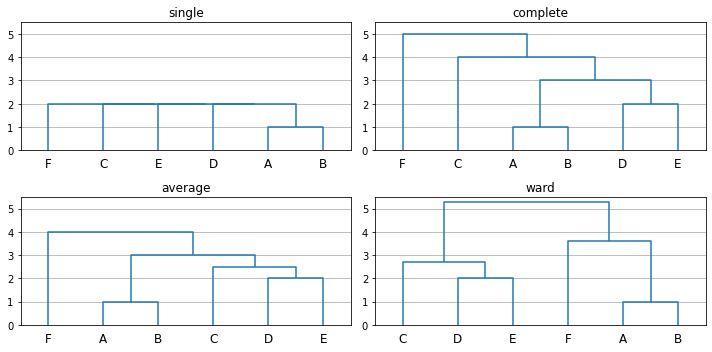

In [5]:
# Please read the documentation here:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
#
# As you'll see below, the different methods of linkage may produce very different structures
# and, consequently, very different clusters. Try to understand why (look at the distance matrix
# and follow the formulas in the documentation).
# Sometimes the characteristics of the problem suggest what method is more natural to use than
# the others. This is especially true with respect to the complete (= farthest point) and single
# (= nearest point) methods. Other times the 'correct' method to use is not obvious at all, and
# it requires inspecting the results and the data thoroughly. The average method usually works
# well, however.

methods = ['single', 'complete', 'average', 'ward']  # There are other methods as well, see documentation

plt.figure(figsize=(10, 5))

for i, method in enumerate(methods):
    plt.subplot(2, 2, i+1)
    plt.title(method)
    
    ############# This is the relevant part: #############
    #                                                    #
    lnk = hierarchy.linkage(squareform(d), method)
    hierarchy.dendrogram(lnk, labels=l, color_threshold=0)
    #                                                    #
    ######################################################
    
    plt.ylim(0, 5.5)
    plt.grid(axis='y')

plt.tight_layout()

### Altering the order in which clusters are joined can also yield strikingly different results

In [6]:
# Labels
l = ['A', 'B', 'C', 'D', 'E']

# Distance matrices
epsilon = 10**-16
a, b = 1 + epsilon, 1 - epsilon

d1 = np.array([[0, 1, a, 5, 5],
               [1, 0, 3, 5, 5],
               [a, 3, 0, 3, b],
               [5, 5, 3, 0, 1],
               [5, 5, b, 1, 0]])

d2 = np.array([[0, 1, b, 5, 5],
               [1, 0, 3, 5, 5],
               [b, 3, 0, 3, a],
               [5, 5, 3, 0, 1],
               [5, 5, a, 1, 0]])

In [7]:
# The Frobenius distance between the matrices is negligible
np.sqrt(np.sum((d1-d2)**2))

2.220446049250313e-16

In [34]:
d1, d2

(array([[0., 1., 1., 5., 5.],
        [1., 0., 3., 5., 5.],
        [1., 3., 0., 3., 1.],
        [5., 5., 3., 0., 1.],
        [5., 5., 1., 1., 0.]]),
 array([[0., 1., 1., 5., 5.],
        [1., 0., 3., 5., 5.],
        [1., 3., 0., 3., 1.],
        [5., 5., 3., 0., 1.],
        [5., 5., 1., 1., 0.]]))

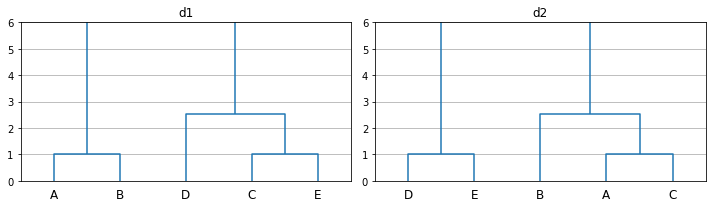

In [9]:
# But the resulting clusters are very different!

plt.figure(figsize=(10, 3))

for i, d in enumerate([d1, d2]):
    plt.subplot(1, 2, i+1)
    plt.title('d%s' % (i+1,))

    lnk = hierarchy.linkage(squareform(d), 'ward') # You can experiment with the different methods ('single', 'complete', 'average', 'ward')
    hierarchy.dendrogram(lnk, labels=l, color_threshold=0)

    plt.ylim(0, 6)
    plt.grid(axis='y')

plt.tight_layout()

## Challenge 1.1 (_max score - 20 points_)
Data preparation and preprocessing can help in reducing such "hypersensitivity". One of the techniques is to clean the distance matrix from noise before the actual clustering. This can be done by... clustering. Your tasks:
1. Apply the K-Means algorithm to clean the distance matrix, assuming the correct number of clusters is 4. Clustering can be applied on each matrix independently, although in some cases it's wiser to do a cross-matrix clustering.
2. Create new cleaned versions of the distance matrices (d1_clean and d2_clean).
3. Repeat the above process (previus cell) to plot the results

/tmp/ipykernel_18436/700262601.py:12: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  d1_km = km.fit(d1_reshaped)
/tmp/ipykernel_18436/700262601.py:27: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  d2_km = km.fit(d2_reshaped)


## d1 ##

Original matrix:
[[0. 1. 1. 5. 5.]
 [1. 0. 3. 5. 5.]
 [1. 3. 0. 3. 1.]
 [5. 5. 3. 0. 1.]
 [5. 5. 1. 1. 0.]]

Kmeans clusters(squareform):
[1 1 0 0 2 0 0 2 1 1]

Clean matrix:
[[0. 1. 1. 5. 5.]
 [1. 0. 3. 5. 5.]
 [1. 3. 0. 3. 1.]
 [5. 5. 3. 0. 1.]
 [5. 5. 1. 1. 0.]]



## d2 ##

Original matrix:
[[0. 1. 1. 5. 5.]
 [1. 0. 3. 5. 5.]
 [1. 3. 0. 3. 1.]
 [5. 5. 3. 0. 1.]
 [5. 5. 1. 1. 0.]]

Kmeans clusters(squareform):
[1 1 0 0 2 0 0 2 1 1]

Clean matrix:
[[0. 1. 1. 5. 5.]
 [1. 0. 3. 5. 5.]
 [1. 3. 0. 3. 1.]
 [5. 5. 3. 0. 1.]
 [5. 5. 1. 1. 0.]]





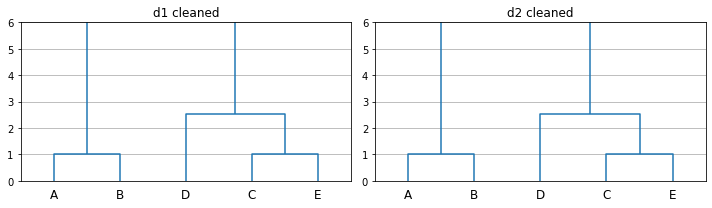

In [120]:
# Add your code for Challenge 1.1 after this line, and keep it in this cell.

from sklearn.cluster import KMeans

# d1 cleaning
km = KMeans(n_clusters=4, random_state=0)
# We will use 4 clusters to find the similar values and we will replace similar values in the same cluster by their center
# Therefor we will be able to "neglect" the epsilon "noise" between a and b values.
d1_sqr = squareform(d1) # Change to squareform
d1_reshaped = d1_sqr.reshape((-1, 1)) # Set each value as sample to fit on
# fit-predict
d1_km = km.fit(d1_reshaped)
d1_preds = d1_km.predict(d1_reshaped)
d1_clean = d1_km.cluster_centers_[d1_preds]
d1_clean = squareform(d1_clean.reshape(-1))
print(f"## d1 ##\n\nOriginal matrix:\n{d1}\n\nKmeans clusters(squareform):\n{d1_preds}\n\nClean matrix:\n{d1_clean}\n\n\n")



# d2 cleaning
km = KMeans(n_clusters=4, random_state=0)
# We will use 4 clusters to find the similar values and we will replace similar values in the same cluster by their center
# Therefor we will be able to "neglect" the epsilon "noise" between a and b values.
d2_sqr = squareform(d2) # Change to squareform
d2_reshaped = d2_sqr.reshape((-1, 1)) # Set each value as sample to fit on
# fit-predict
d2_km = km.fit(d2_reshaped)
d2_preds = d2_km.predict(d2_reshaped)
d2_clean = d2_km.cluster_centers_[d2_preds]
d2_clean = squareform(d2_clean.reshape(-1))
print(f"## d2 ##\n\nOriginal matrix:\n{d2}\n\nKmeans clusters(squareform):\n{d2_preds}\n\nClean matrix:\n{d2_clean}\n\n\n")


# Replotting the results on the clean matrices (same code)
plt.figure(figsize=(10, 3))

for i, d in enumerate([d1_clean, d2_clean]):
    plt.subplot(1, 2, i+1)
    plt.title('d%s cleaned' % (i+1,))

    lnk = hierarchy.linkage(squareform(d), 'ward') # You can experiment with the different methods ('single', 'complete', 'average', 'ward')
    hierarchy.dendrogram(lnk, labels=l, color_threshold=0)

    plt.ylim(0, 6)
    plt.grid(axis='y')

plt.tight_layout()

### Analyzing voting data

We can also use hierarchical clustering to analyzie election voting data, as we will see in the following exercise

We will use here data from the 18th Kneset elections. https://en.wikipedia.org/wiki/2009_Israeli_legislative_election


In [65]:
df = pd.read_csv('Elections.csv')

# Show first 10 rows
df[:10]
df.shape

(1156, 41)

In [66]:
party_names = list(df.columns)[7:]
print(party_names)

['Avoda', 'Or', 'BaitYehudi', 'YahadutHatora', 'Balad', 'MeimadYarukim', 'Hadash', 'Gimlaim', 'EfraimSne', 'IhudLeumi', 'Israelim', 'Lev', 'NizolimAndAle', 'Kadima', 'IsraelBeytenu', 'Likud', 'Merez', 'Nudelman', 'RuahHadasha', 'Lazuz', 'LojmeiHevra', 'Raam', 'Koah', 'Koah.1', 'Brit', 'Gever', 'Zomet', 'Zabar', 'Daam', 'AleYarok', 'Koah.2', 'Lidar', 'Yarok', 'Shas']


In [67]:
# Number of cities to cluster (they are ordered by the total number of votes, descending)
n = 100

# Data matrix and labels list (41 columns - metadata ones)
x = np.zeros((n, 34))
labels_r = []

# Iterate over rows in dataframe
for i, row in df[:n].iterrows():
    x[i] = row[7:]                         # take only the votes, not the other meta-data
    labels_r.append(df.TownName[i][::-1])  # reverse the labels (because they are in Hebrew)

# Normalize rows (so they represent proportions):
x = x/(np.sum(x, axis=1).reshape(-1, 1))
x = pd.DataFrame(x,columns=party_names)

In [68]:
x

,Avoda,Or,BaitYehudi,YahadutHatora,Balad,MeimadYarukim,Hadash,Gimlaim,EfraimSne,IhudLeumi,...,Brit,Gever,Zomet,Zabar,Daam,AleYarok,Koah.2,Lidar,Yarok,Shas
0,0.152210,0.000344,0.015254,0.010022,0.003004,0.013625,0.023228,0.008112,0.002040,0.012281,...,0.000161,0.000183,0.000188,0.001219,0.000884,0.004478,0.000223,0.000183,0.004826,0.064339
1,0.057267,0.000176,0.041457,0.189707,0.002457,0.020946,0.006814,0.004366,0.001052,0.066097,...,0.000121,0.000088,0.000107,0.000681,0.000297,0.002012,0.000121,0.000181,0.002063,0.151217
2,0.128268,0.000319,0.025470,0.022715,0.020570,0.007787,0.041073,0.011298,0.002375,0.016072,...,0.000097,0.000215,0.000497,0.001618,0.000661,0.003600,0.000304,0.000275,0.003467,0.030562
3,0.109177,0.000216,0.021159,0.005490,0.000233,0.004273,0.001191,0.006371,0.002279,0.014235,...,0.000190,0.000190,0.000207,0.002055,0.000544,0.003919,0.000259,0.000259,0.005007,0.058564
4,0.087569,0.000202,0.061099,0.034356,0.000243,0.004166,0.001062,0.007563,0.002427,0.041595,...,0.000192,0.000162,0.000212,0.000910,0.000455,0.003337,0.000415,0.000324,0.003448,0.081502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.043900,0.000190,0.027366,0.030217,0.000190,0.009502,0.000190,0.005511,0.001140,0.056632,...,0.000190,0.000000,0.000760,0.001520,0.000000,0.003991,0.000000,0.000380,0.006461,0.105663
96,0.116788,0.000192,0.018440,0.007876,0.000192,0.003458,0.000960,0.005955,0.004418,0.013638,...,0.000000,0.000000,0.000000,0.000768,0.000384,0.004610,0.000000,0.000000,0.003842,0.071456
97,0.167918,0.000395,0.000790,0.000000,0.038325,0.000198,0.099170,0.000395,0.001185,0.000198,...,0.000395,0.000198,0.037732,0.000593,0.001580,0.002371,0.000000,0.002173,0.001383,0.265508
98,0.003765,0.000198,0.000594,0.000594,0.394492,0.000594,0.299188,0.000594,0.000198,0.001783,...,0.000396,0.000000,0.000594,0.000396,0.000991,0.000594,0.000396,0.000396,0.000396,0.001783


In [69]:
labels_r

['ופי - ביבא לת',
 'םילשורי',
 'הפיח',
 'ןויצל ןושאר',
 'הווקת חתפ',
 'דודשא',
 'ןולוח',
 'הינתנ',
 'עבש ראב',
 'ןג תמר',
 'קרב ינב',
 'םי תב',
 'תובוחר',
 'ןולקשא',
 'הילצרה',
 'אבס רפכ',
 'הננער',
 'הרדח',
 'וער-םיבכמ-ןיעידומ',
 'םייתעבג',
 'דול',
 'הירהנ',
 'הלמר',
 'אתא תירק',
 'ןורשה דוה',
 'שמש תיב',
 'לאימרכ',
 'ןורשה תמר',
 'וכע',
 'תג תירק',
 'תרצנ',
 'ןיקצומ תירק',
 'תיליע תרצנ',
 'קילאיב תירק',
 'םי תירק',
 'הלופע',
 'ןיעה שאר',
 'תליא',
 'הנויצ סנ',
 'ונוא תירק',
 'הירבט',
 'הנבי',
 'םימודא הלעמ',
 'םחפ-לא םוא',
 'הדוהי רוא',
 'ןוסונומ-דוהי',
 'רוכרכ-הנח סדרפ',
 'תיליע ןיעידומ',
 'הבייט',
 'רוגש',
 "ןינ'חס",
 'הנומיד',
 'ןויצ תרשבמ',
 'קמעה לדגמ',
 'דעלא',
 'רשנ',
 'תוביתנ',
 'דרע',
 'תפצ',
 'לאומש תעבג',
 'םערפש',
 'אחישרת-תולעמ',
 'םיקפוא',
 'תיליע רתיב',
 "ת'ג-הקאב",
 'הרמט',
 'הנומש תירק',
 'תיליע םענקי',
 'למרכ תריט',
 'םהוש',
 'בקעי ןורכז',
 'לאירא',
 'יכאלמ תירק',
 'תורדש',
 'הריט',
 'ןועבט תירק',
 'הנבי ןג',
 'טהר',
 'הרדג',
 'למרכ ריע',
 'הבארע',
 'ןרוצ-המידק',
 'ם

In [70]:
# You can experiment with the different methods ('single', 'complete', 'average', 'ward'):
# (Note that we don't use squareform here, so the linkage function will assume by
# default that x is not a distance matrix but a set of observations, and will calculate
# the euclidean distance between them. We could, instead, calculate our own distance
# matrix using other distance measures between distributions, for example the Kullback-
# Leibler divergence (relative entropy).)
lnk = hierarchy.linkage(x, 'average')

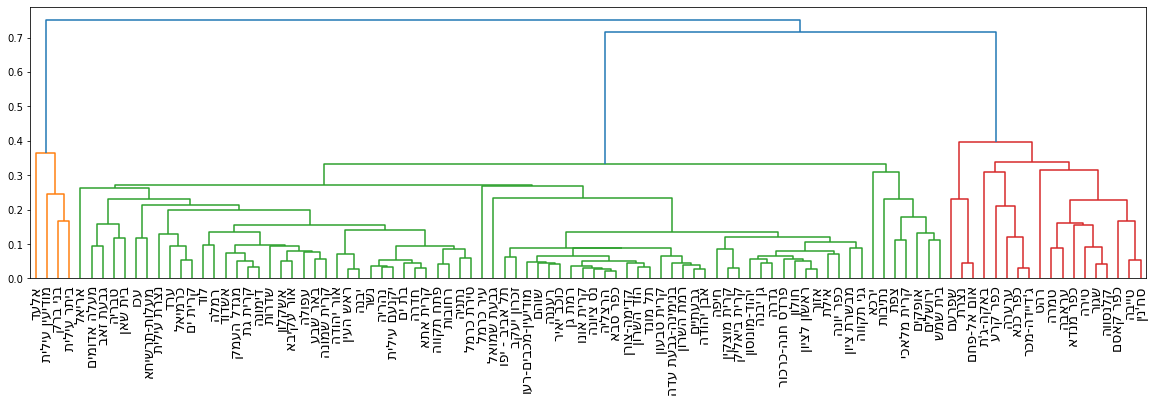

In [71]:
plt.figure(figsize=(20, 5))

# You can experiment with the color threshold to observe the different possible clusterizations:
hierarchy.dendrogram(lnk, labels=labels_r, leaf_font_size=14, color_threshold=0.5);

## Challenge 1.2 (_max score - 30 points_)
When using our domain expertise regarding the population in Israeli cities and villages, we can cleary conclude from the results that our society is mainly splitted according to their "religiosity". Although the jingle says "there's no more right or left", your mission, should you choose to accept it, is to find a way to distinguish between right and left.

The guiding line:
1. We want to cluster parties (for example, left or right winged). Adjust the matrix accordingly.
2. You can change the max number of cities (100 is set now) or the normalization technique.
3. We do not expect to have exact coalition proposed by this technique, however, explain (in a text cell) the gaps between your results and the real agenda proposed by the parties. What exactly could have caused this gaps?

In [90]:
# Add your code for Challenge 1.2 after this line, and keep it in this cell.
city_count = 50
r = df[:city_count].transpose().reset_index()[7:].set_index('index')
# Adding total votes feature
r['total_votes'] = df.sum()[7:]
# Normalizing the values (I normalized per city as with my experience I assume that cities with population that tends more towards right parties for example will have similar ratio of votes to the same right parties):
r_norm = r.divide(r.sum())
r_norm

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,total_votes
index,,,,,,,,,,,,,,,,,,,,,
Avoda,0.15221,0.057267,0.128268,0.109177,0.087569,0.044062,0.108542,0.072855,0.071635,0.147107,...,0.093728,0.030768,0.001925,0.087016,0.136545,0.101675,0.000074,0.002357,0.008786,0.09852
Or,0.000344,0.000176,0.000319,0.000216,0.000202,0.000243,0.000253,0.000406,0.000244,0.000427,...,0.000188,0.000067,0.0,0.000501,0.000071,0.000146,0.0,0.0,0.000078,0.000236
BaitYehudi,0.015254,0.041457,0.02547,0.021159,0.061099,0.014761,0.016202,0.042548,0.020654,0.02916,...,0.02373,0.046923,0.0,0.02922,0.015489,0.032047,0.002357,0.001217,0.002196,0.028311
YahadutHatora,0.010022,0.189707,0.022715,0.00549,0.034356,0.085475,0.005175,0.022724,0.006846,0.007086,...,0.011677,0.007575,0.000138,0.008379,0.007281,0.006773,0.727072,0.000076,0.000235,0.044701
Balad,0.003004,0.002457,0.02057,0.000233,0.000243,0.000454,0.000207,0.000406,0.00113,0.00016,...,0.000063,0.000067,0.24211,0.000286,0.000071,0.000218,0.0,0.157414,0.249686,0.025949
MeimadYarukim,0.013625,0.020946,0.007787,0.004273,0.004166,0.001889,0.003691,0.003429,0.003519,0.008648,...,0.003516,0.003553,0.000413,0.00308,0.005211,0.025127,0.000221,0.000076,0.000157,0.007996
Hadash,0.023228,0.006814,0.041073,0.001191,0.001062,0.000485,0.001575,0.000811,0.002569,0.004057,...,0.000879,0.000871,0.552224,0.001719,0.001356,0.005899,0.0,0.28251,0.295968,0.034615
Gimlaim,0.008112,0.004366,0.011298,0.006371,0.007563,0.0046,0.008739,0.006268,0.006114,0.013492,...,0.002825,0.002949,0.0,0.004369,0.00464,0.008594,0.000074,0.0,0.000078,0.005326
EfraimSne,0.00204,0.001052,0.002375,0.002279,0.002427,0.00115,0.00261,0.002224,0.002158,0.00419,...,0.002072,0.000938,0.000206,0.003008,0.002926,0.003059,0.0,0.000228,0.000157,0.001993


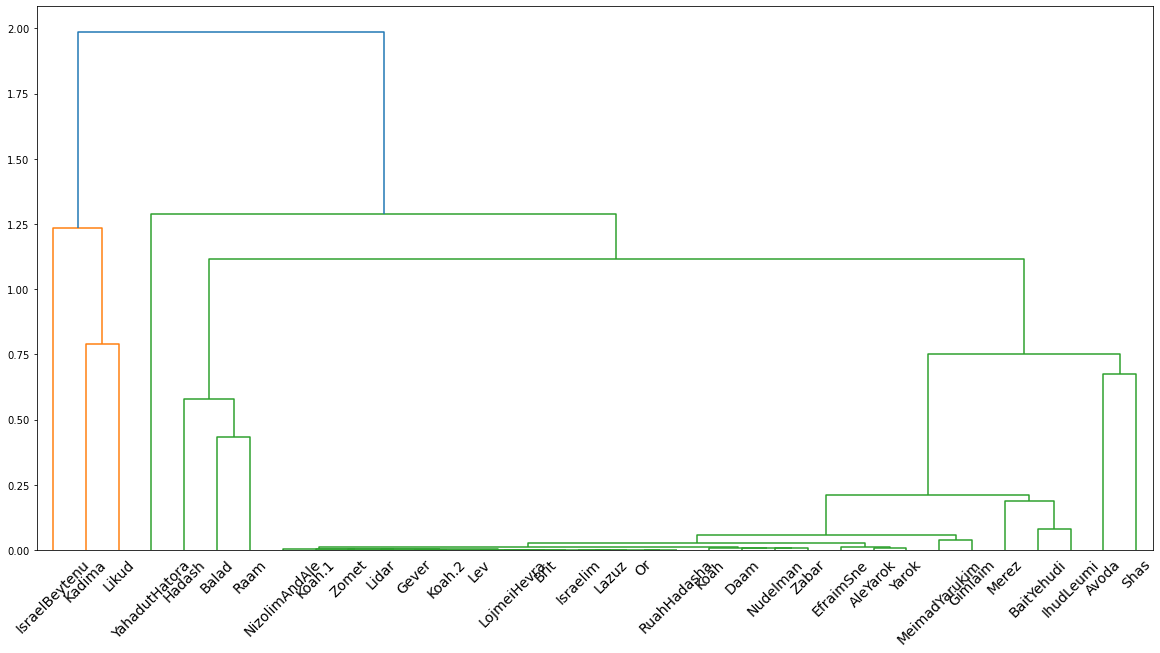

In [91]:
lnk = hierarchy.linkage(r_norm, 'complete')
plt.figure(figsize=(20, 10))

# You can experiment with the color threshold to observe the different possible clusterizations:
hierarchy.dendrogram(lnk, labels=r.index, leaf_font_size=14, color_threshold=1.5);

##### My comments on the results

We can see that the main big right parties were separated correctly:
- Right: IsraelBeytenu / Kadima / Likud - This is probably because they have similar majorities and voting rates in the big cities in Israel

Other than that, there are a couple of phenomenas that I see and believe I can explain:
1. Hadash / Balad / Raam - Clustered closely together, which are the main Arab-Israeli parties that are probably getting more votes from the arab Israeli cities (since we used vote counts per city, this makes sense).
2. There is a huge group of parties with super very low distance between them (e.g. Lev / Koah / Zomet / etc.) - I believe that this is due to the fact that they barely get any votes anywhere - Therefor they all have similar sparse vectors and therefor they are very close overall and specifically in the average case(as we used complete linkage). I think we can probably clean the matrix from such parties as they are almost meaningless.
3. I tried multiple number of cities to base the decision on and the linking type, I had the best results when playing with 50~ largest cities and complete linkage, it makes sense that the 50 largest samples will represent the data well and that adding some small cities just increases the distances between points and can have bad impact.

## Part 2 - DBSCAN


In this part of the exercise, we will experiment with the DBSCAN algorithm on a synthetic set of data

In [18]:
# auxilary plotting functions
def plot(X,y=None):# plot
    plt.scatter(X[:, 0], X[:, 1],c=y)
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")
    plt.show()
    
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import preprocessing

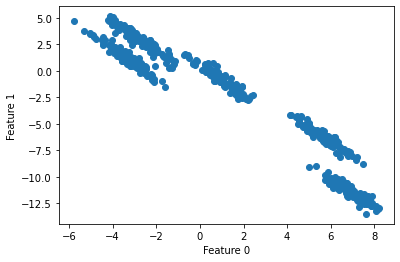

In [19]:
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=500, centers = 5)
rng = np.random.RandomState(74)
# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

plot(X)

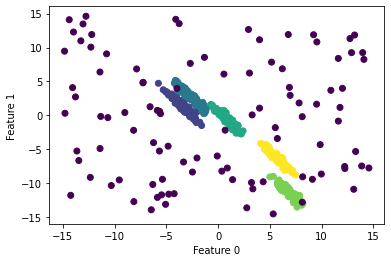

In [20]:
# Adding Noise to data
outliers = 30 * (np.random.RandomState(42).rand(100, 2) ) - 15.0
X = pd.DataFrame(np.concatenate([X, outliers]))
y = pd.DataFrame(np.concatenate([y, [-1]*len(outliers)]))
plot(X.values,y)

### K-Means attempt
Lets see how those outliers and non-spherical shapes affects K-Means clustreing

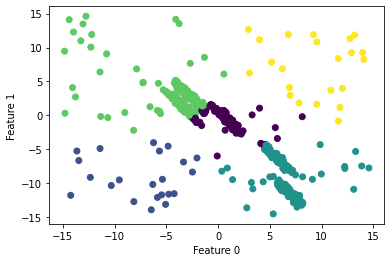

In [21]:
# cluster the data into five clusters
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)
kmeans_clusters = kmeans.predict(X)

plot(X.values,kmeans_clusters)

Not surprisingly, K-Means failed to cluster properly the data above 

As we saw in the lecture, DBSCAN can overcome those issues. Yet we still need to determine the parametrs...




# Estimateing $\varepsilon$

## Challenge 2.1 (_max score - 30 points_)

Your co-worker suggested a way to select $\epsilon$ of dbscan.
He wants to go over different eps values and find the one that maximizes the adjusted rand index value. For that, you paid some amount of money and had some guys labled 50 points for you. The indices of the labeled samples you are allowed to use are in the next cell.
Implement the algorithm and find the best $\epsilon$ using this method.
1. Create an array of possible $\epsilon$ values.
2. Iterate over the different values and find the best $\epsilon$ value. What is it?
3. Visualize the results of the best one.



In [22]:
np.random.seed(0)
labeled_samples = np.random.choice(601,50,replace=False)
y.iloc[labeled_samples,0].head()

596   -1
52     1
190    1
165    4
344    4
Name: 0, dtype: int64

In [23]:
labeled_samples

array([596,  52, 190, 165, 344, 342, 441, 406, 389, 243, 301, 571, 412,
       525, 186, 122, 369, 484,  62, 213, 187, 225, 436, 239, 233, 242,
       222, 379, 599, 268, 570, 196, 246,  48, 376, 162, 427, 308, 250,
       483, 230,  14, 304, 170,  85, 542, 584,   1, 490, 390])

<AxesSubplot:xlabel='eps_value', ylabel='ari_score'>

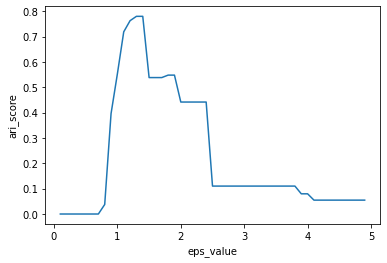

In [24]:
# minPts are given and are not required to be estimated.
# Yet, in the cells after completing the task feel free to play with it and get better result if you can!
minPts = 50 

# YOUR CODE HERE - keep results in this cell

from sklearn.cluster import DBSCAN 
from sklearn.metrics.cluster import adjusted_rand_score
import seaborn as sns


optional_eps= np.arange(0.1, 5, 0.1)

eps_scores = []

for eps in optional_eps:
    # cluster the data 
    dbscan = DBSCAN(eps=eps, min_samples=minPts)
    dbscan_clusters = dbscan.fit_predict(X)
   
    # Look on the clusters, specific for the 50 labels that we got
    clustered_samples_val = dbscan_clusters[labeled_samples]
    labelled_samples_val = np.array(y.iloc[labeled_samples, 0])
    
    # Evaluate and save the current epsilon value and ajusted random index value
    eps_scores.append((eps, adjusted_rand_score(clustered_samples_val, labelled_samples_val)))
    
eps_df = pd.DataFrame(eps_scores, columns=['eps_value', 'ari_score'])
sns.lineplot(data=eps_df, x='eps_value', y='ari_score')

In [25]:
eps_df.sort_values('ari_score', ascending=False).head(5)

,eps_value,ari_score
13,1.4,0.780180
12,1.3,0.780180
11,1.2,0.763054
10,1.1,0.719025
9,1.0,0.553371


So according to our graph and attempts to find the best epsilon by only using the 50 labelled samples, the best value for us it eps=1.3, lets plot it:

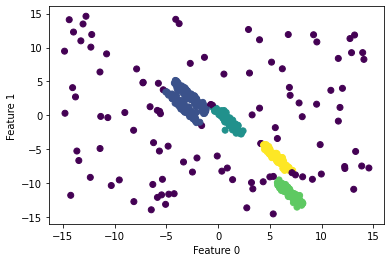

In [32]:
dbscan_best = DBSCAN(eps=1.3, min_samples=minPts)
dbscan_best_clusters = dbscan_best.fit_predict(X)

plot(X.values, dbscan_best_clusters)

How many values of $\epsilon$ did you iterate? can you find a way to narrow down the range of the search?

Answers are expected in a textual form

I've iterated through 50~ different epsilon values (0.1-5 in steps of 0.1).

This is deffinitely not efficient.

I have a couple of ideas on how to optimize this search:
1. Searching for epsilon based on the feature values we have, for example: epsilon_max_value = max(feature) - min(feature) / 10 (this formula can be changed to multi-features version).
2. Normalizing the feature values + searching in the same method as 1.
3. Using early stop - Start searching from the lowest to highest value. When increasing epsilon in my search, if our metric for performance did not improve in the last X iterations stop the search.

## Challenge 2.2 (_max score - 20 points_)


Support yout findings by plotting the Purity score.
Implement the purity score and print the score for the best epsilon you have found.
Print the results for:
1. The small labeled set you were given
2. The rest of the data (not including the set from 1)
3. The whole data together

Are we overfitting?

In [33]:
import numpy as np
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [34]:
labelled_samples_val = np.array(y.iloc[labeled_samples, 0])

##### Labelled set purity

In [42]:
print("Purity score:", purity_score(y_true=labelled_samples_val, y_pred=dbscan_best_clusters[labeled_samples]))

Purity score: 0.82


##### Non-labelled set purity

In [43]:
y_rest_of_data = y[~y.index.isin(y.iloc[labeled_samples].index.tolist())]
clusters_rest_of_data = dbscan_best_clusters[[i for i in range(dbscan_best_clusters.shape[0]) if i not in labeled_samples]]

print("Purity score:", purity_score(y_true=y_rest_of_data, y_pred=clusters_rest_of_data))

Purity score: 0.8127272727272727


##### Entire dataset purity

In [44]:
print("Purity score:", purity_score(y_true=y, y_pred=dbscan_best_clusters))

Purity score: 0.8133333333333334


Based on these numbers, I wouldn't say we're overfitting, we just lacked labels in the training to evaluate the performance.
Since we already "know" the actual labels compared to the 50 we trained on, we see that the purity levels are steady even on the entire dataset jsut based on these samples (there is a minor drop of less than 0.01% which is more than reasonable compared to the low number of labels we used to optimize the ARI).




# Good Luck and Enjoy Learning Machine Learning!

